In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.drop(columns = "Unnamed: 0",inplace = True)

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
# checking for null value
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.duplicated().sum()

146

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

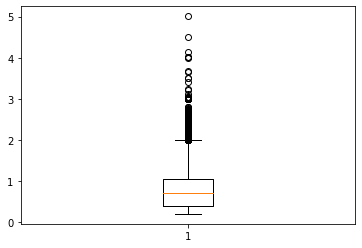

In [12]:
plt.boxplot(df["carat"])
plt.show()

In [13]:
# This Function is use to find lower and upper fence using IQR method
def IQR_method(x):
    Q1=x.quantile(q=.25)
    Q3=x.quantile(q=.75)
    IQR=Q3-Q1
    LF = Q1-(1.5*IQR)
    UF= Q3+(1.5*IQR)
    print("lower_fence",LF)
    print("upper_fence",UF)

In [14]:
IQR_method(df["carat"])

lower_fence -0.5599999999999999
upper_fence 2.0


In [15]:
df["carat"] = np.where(df["carat"]>2,2,df["carat"])

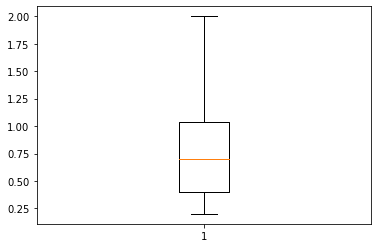

In [16]:
plt.boxplot(df["carat"])
plt.show()

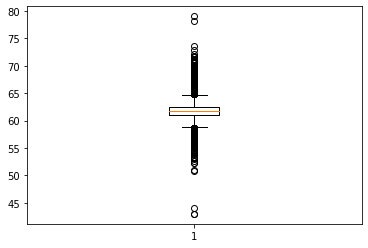

In [17]:
plt.boxplot(df["depth"])
plt.show()

In [18]:
IQR_method(df["depth"])

lower_fence 58.75
upper_fence 64.75


In [19]:
df["depth"] = np.where(df["depth"]>64.75,64.75,df["depth"])
df["depth"] = np.where(df["depth"]<58.75,58.75,df["depth"])

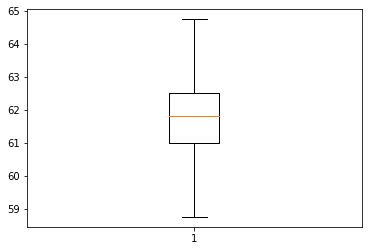

In [20]:
plt.boxplot(df["depth"])
plt.show()

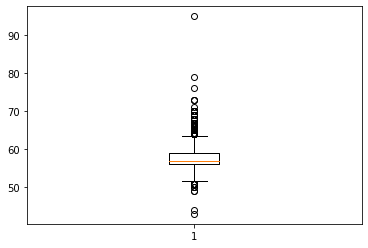

In [21]:
plt.boxplot(df["table"])
plt.show()

In [22]:
IQR_method(df["table"])

lower_fence 51.5
upper_fence 63.5


In [23]:
df["table"] = np.where(df["table"]>63.5,63.5,df["table"])
df["table"] = np.where(df["table"]<51.5,51.5,df["table"])

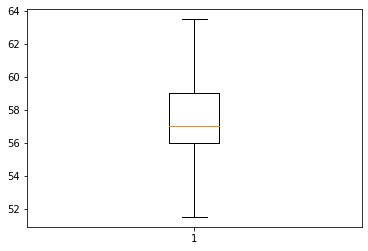

In [24]:
plt.boxplot(df["table"])
plt.show()

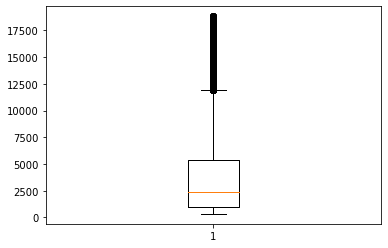

In [25]:
plt.boxplot(df["price"])
plt.show()

In [26]:
IQR_method(df["price"])

lower_fence -5612.625
upper_fence 11890.375


In [27]:
df["price"] = np.where(df["price"]>11890.375,11890.375,df["price"])

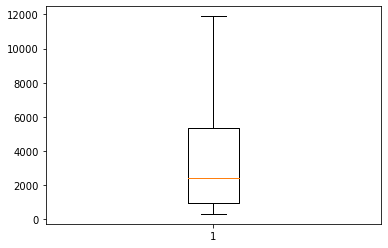

In [28]:
plt.boxplot(df["price"])
plt.show()

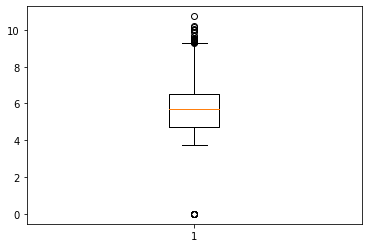

In [29]:
plt.boxplot(df["x"])
plt.show()

In [30]:
IQR_method(df["x"])

lower_fence 1.9649999999999999
upper_fence 9.285


In [31]:
df["x"] = np.where(df["x"]>9.285,9.285,df["x"])
df["x"] = np.where(df["x"]<1.965,1.965,df["x"])

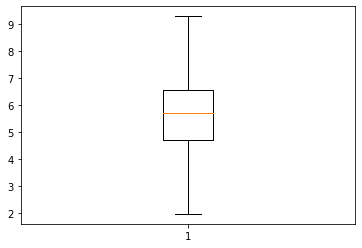

In [32]:
plt.boxplot(df["x"])
plt.show()

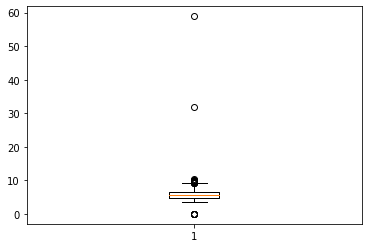

In [33]:
plt.boxplot(df["y"])
plt.show()

In [34]:
IQR_method(df["y"])

lower_fence 1.9899999999999993
upper_fence 9.27


In [35]:
df["y"] = np.where(df["y"]>9.27,9.27,df["y"])
df["y"] = np.where(df["y"]<1.99,1.99,df["y"])

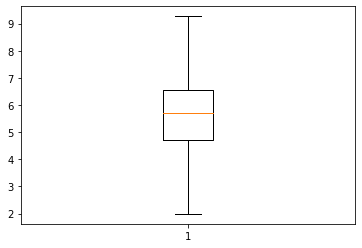

In [36]:
plt.boxplot(df["y"])
plt.show()

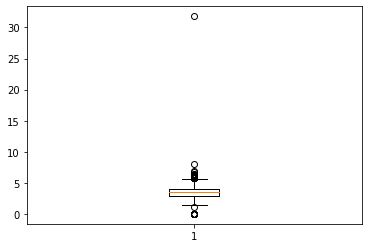

In [37]:
plt.boxplot(df["z"])
plt.show()

In [38]:
IQR_method(df["z"])

lower_fence 1.23
upper_fence 5.710000000000001


In [39]:
df["z"] = np.where(df["z"]>5.710,5.710,df["z"])
df["z"] = np.where(df["z"]<1.23,1.23,df["z"])

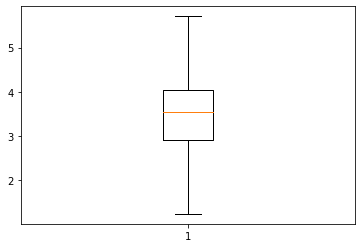

In [40]:
plt.boxplot(df["z"])
plt.show()

In [41]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74


In [42]:
df1 = pd.get_dummies(df,columns = ["cut","color","clarity"],
              drop_first=True)

In [43]:
df1

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.0,326.0,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.80,61.0,326.0,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,58.75,63.5,327.0,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.40,58.0,334.0,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.30,58.0,335.0,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.80,57.0,2757.0,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.10,55.0,2757.0,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.80,60.0,2757.0,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.00,58.0,2757.0,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [44]:
y = df1["price"]
X = df1.drop(columns = ["price"])

In [47]:
y

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53794, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=88)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
lr.score(X_train,y_train)

0.9403529998823005

In [54]:
print("train Accuracy ",lr.score(X_train,y_train))
print("test Accuracy",lr.score(X_test,y_test))

train Accuracy  0.9403529998823005
test Accuracy 0.9417364598889015
